# 1. Acquiring, preprocessing, and analyzing the data

Importing libraries that are necessary for the project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks", color_codes = True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First we load in the data and take a look

In [18]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'
tictactoe = pd.read_csv(url)
tictactoe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


Note that the dataset is categorical.

Let's do little bit of processing of different variables that might be interesting to look at. First, we look at the datatype of each column:

In [20]:
tictactoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
x           957 non-null object
x.1         957 non-null object
x.2         957 non-null object
x.3         957 non-null object
o           957 non-null object
o.1         957 non-null object
x.4         957 non-null object
o.2         957 non-null object
o.3         957 non-null object
positive    957 non-null object
dtypes: object(10)
memory usage: 74.9+ KB


We check how do the entries of columns vary:

In [22]:
for c in range(tictactoe.shape[1]):
    same_features = tictactoe.isin(['x']).sum(axis = 0)[c:c+1] #checking the occurance of x
    print(same_features)
    print('Rate of same features:', same_features/tictactoe.shape[0])

x    417
dtype: int64
Rate of same features: x    0.435737
dtype: float64
x.1    377
dtype: int64
Rate of same features: x.1    0.393939
dtype: float64
x.2    417
dtype: int64
Rate of same features: x.2    0.435737
dtype: float64
x.3    377
dtype: int64
Rate of same features: x.3    0.393939
dtype: float64
o    458
dtype: int64
Rate of same features: o    0.478579
dtype: float64
o.1    378
dtype: int64
Rate of same features: o.1    0.394984
dtype: float64
x.4    417
dtype: int64
Rate of same features: x.4    0.435737
dtype: float64
o.2    378
dtype: int64
Rate of same features: o.2    0.394984
dtype: float64
o.3    418
dtype: int64
Rate of same features: o.3    0.436782
dtype: float64
positive    0
dtype: int64
Rate of same features: positive    0.0
dtype: float64


The variety of data is acceptable.

Just in case, the datatype inconsistensy is analyzed in a different way as well:

In [23]:
# Detecting dtype inconsistency
print('Columns with data type inconsistensy:')
n_weird_columns = 0
for col in tictactoe.columns:
    weird = (tictactoe[[col]].applymap(type) != tictactoe[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(tictactoe[weird]) > 0:
        print(col)
        n_weird_columns = n_weird_columns + 1
if (n_weird_columns == 0):
    print('None')

Columns with data type inconsistensy:
None


The last column has the 'object' type. It is transformed into numerical values with 0 corresponding to 'negative' and 1 corresponding to 'positive' as follows:

In [25]:
for i in range(len(tictactoe['positive'])):
    y_i = tictactoe['positive'][i]
    if (y_i == 'negative'):
        tictactoe['positive'][i] = 0
    elif (y_i == 'positive'):
        tictactoe['positive'][i] = 1

tictactoe = tictactoe.astype({'positive': 'int64'})
tictactoe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,1
1,x,x,x,x,o,o,o,o,x,1
2,x,x,x,x,o,o,o,b,b,1
3,x,x,x,x,o,o,b,o,b,1
4,x,x,x,x,o,o,b,b,o,1
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,0
953,o,x,o,x,x,o,x,o,x,0
954,o,x,o,x,o,x,x,o,x,0
955,o,x,o,o,x,x,x,o,x,0


In [26]:
tictactoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
x           957 non-null object
x.1         957 non-null object
x.2         957 non-null object
x.3         957 non-null object
o           957 non-null object
o.1         957 non-null object
x.4         957 non-null object
o.2         957 non-null object
o.3         957 non-null object
positive    957 non-null int64
dtypes: int64(1), object(9)
memory usage: 74.9+ KB


We make a numerical copy of the dataset for future:

In [45]:
tictactoe_num = tictactoe.replace({'x': 1}, regex = True)
tictactoe_num = tictactoe_num.replace({'o': 2}, regex = True)
tictactoe_num = tictactoe_num.replace({'b': 0}, regex = True)
#chess_num = chess_num.astype('int64')
tictactoe_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
x           957 non-null int64
x.1         957 non-null int64
x.2         957 non-null int64
x.3         957 non-null int64
o           957 non-null int64
o.1         957 non-null int64
x.4         957 non-null int64
o.2         957 non-null int64
o.3         957 non-null int64
positive    957 non-null int64
dtypes: int64(10)
memory usage: 74.9 KB


In [46]:
tictactoe_num

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,1,1,1,1,2,2,2,1,2,1
1,1,1,1,1,2,2,2,2,1,1
2,1,1,1,1,2,2,2,0,0,1
3,1,1,1,1,2,2,0,2,0,1
4,1,1,1,1,2,2,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
952,2,1,1,1,2,2,2,1,1,0
953,2,1,2,1,1,2,1,2,1,0
954,2,1,2,1,2,1,1,2,1,0
955,2,1,2,2,1,1,1,2,1,0


Splitting the data into the test and train datasets:

In [47]:
msk = np.random.rand(len(tictactoe)) < 0.8
train = tictactoe[msk]
test = tictactoe[~msk]

train_num = tictactoe_num[msk]
test_num = tictactoe_num[~msk]

print('Train entries: ' + str(len(train)))
print('Test entries: ' + str(len(test)))

Train entries: 779
Test entries: 178


Checking how much of the train data correspond to win and no win:

In [48]:
X_train = train.iloc[:, :-1] # feature values
y_train = train.iloc[:, -1] # target values

X_train_num = train_num.iloc[:, :-1] # feature values
y_train_num = train_num.iloc[:, -1] # target values

print('Number of positive entries: ' + str(train.loc[y_train == 1].shape[0]))
print('Number of negative entries: ' + str(train.loc[y_train == 0].shape[0]))

Number of positive entries: 508
Number of negative entries: 271


We can take a look at the prior probability of 'good' entries:

In [49]:
prior = train.loc[y_train == 1].shape[0] / (train.loc[y_train == 1].shape[0] + train.loc[y_train == 0].shape[0])
prior

0.6521181001283697

We can plot some data to see potential dependencies.

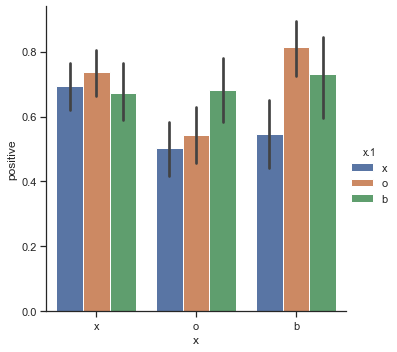

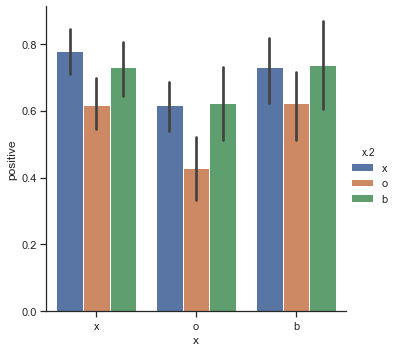

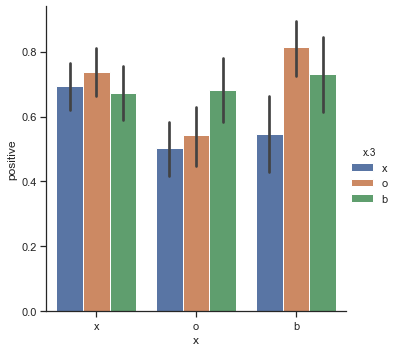

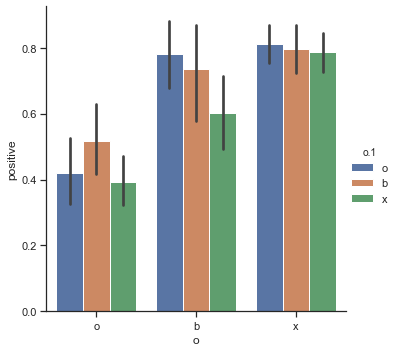

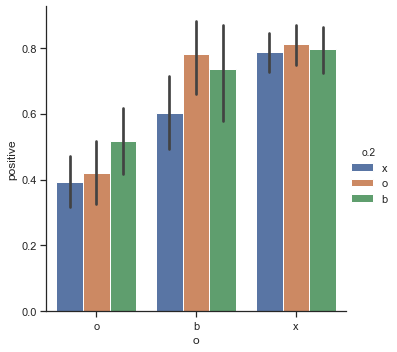

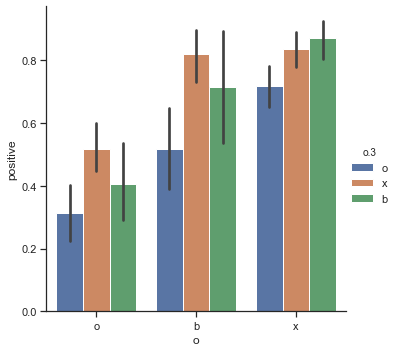

In [50]:
sns.catplot(x = "x", y = "positive", hue = "x.1", kind = "bar", data = tictactoe);
sns.catplot(x = "x", y = "positive", hue = "x.2", kind = "bar", data = tictactoe);
sns.catplot(x = "x", y = "positive", hue = "x.3", kind = "bar", data = tictactoe);

sns.catplot(x = "o", y = "positive", hue = "o.1", kind = "bar", data = tictactoe);
sns.catplot(x = "o", y = "positive", hue = "o.2", kind = "bar", data = tictactoe);
sns.catplot(x = "o", y = "positive", hue = "o.3", kind = "bar", data = tictactoe);

Notice that whomever goes first in a Tic-Tac-Toe game and puts his first mark in the very middle cell usually wins. 

# 2. Implementing the models

## 2.1. Implementing logistic regression

A class for logistic regression with gradient descent:

In [51]:
class Logistic_Regression:
    def __init__(self,
                 lr = 0.01, #learning rate of the gradient descent method
                 eps = 1e-2, # termination condition of the gradient descent method
                ):
        self.lr = lr
        self.eps = eps
        
    # Implementing the logistic function
    def __logistic_function(self, x):
        return 1/(1 + np.exp(-x))
    
    # Implementing the cost function
    def __cost(self,
               w, # N
               X_train, # N x D
               y_train, # N
              ):
        z = np.dot(X_train, w) # N x 1
        J = np.mean(y_train * np.log1p(np.exp(-z)) + (1 - y_train) * np.log1p(np.exp(z)))
        return J
    
    # Implementing the gradient function
    def __gradient(self,
                   w, # N
                   X_train, # N x D
                   y_train, # N
                  ):
        N = y_train.size
        z = np.dot(X_train, w) # N x 1
        yh = self.__logistic_function(z)
        return np.dot(X_train.T, (yh - y_train)) / N
    
    def __GradientDescent(self,
                          X_train, # N x D
                          y_train, # N
                          lr, #learning rate
                          eps # termination condition is used if n_iterations == 0
                         ):
        #N, D = X.shape
        N = X_train.shape[0]
        
        intercept = np.ones((N, 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
        
        D = X_train.shape[1]
        
        w = np.zeros(D)
        g = np.inf
        
        n_iterations = 0 # just for counting the number of iterations
        while (np.linalg.norm(g) > eps):
            g = self.__gradient(w, X_train, y_train)
            w = w - lr * g

            n_iterations += 1

        print('Number of iterations of the gradient descent:', n_iterations)
        
        return w
    
    # Implementing the fit function
    def fit(self,
            X_train, # N x D
            y_train # N
            ):
        
        w = self.__GradientDescent(X_train, y_train, self.lr, self.eps)
        
        return w
    
    # Implementing the predict function
    def predict (self,
                 X_test,
                 w,
                threshold = 0.5
                ):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)

        return self.__logistic_function(np.dot(X_test, w)) >= threshold
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == True)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == False)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1
        
        accuracy = correct/(correct + incorrect)
        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy of the logistic regression:', correct/(correct + incorrect))
        
        return accuracy

Essentially the same class but instead of the termiantion condition $\epsilon$ the number of iterations $n_{iterations}$ is used

In [52]:
class Logistic_Regression_Iter:
    def __init__(self,
                 lr = 0.01, #learning rate of the gradient descent method
                 n_iterations = 1e-2, # number of iterations of the gradient descent method
                ):
        self.lr = lr
        self.n_iterations = n_iterations
        
    # Implementing the logistic function
    def __logistic_function(self, x):
        return 1/(1 + np.exp(-x))
    
    # Implementing the cost function
    def __cost(self,
               w, # N
               X_train, # N x D
               y_train, # N
              ):
        z = np.dot(X_train, w) # N x 1
        J = np.mean(y_train * np.log1p(np.exp(-z)) + (1 - y_train) * np.log1p(np.exp(z)))
        return J
    
    # Implementing the gradient function
    def __gradient(self,
                   w, # N
                   X_train, # N x D
                   y_train, # N
                  ):
        N = y_train.size
        z = np.dot(X_train, w) # N x 1
        yh = self.__logistic_function(z)
        return np.dot(X_train.T, (yh - y_train)) / N
    
    def __GradientDescent(self,
                          X_train, # N x D
                          y_train, # N
                          lr, #learning rate
                          n_iterations # termination condition
                         ):
        #N, D = X.shape
        N = X_train.shape[0]
        
        intercept = np.ones((N, 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
        
        D = X_train.shape[1]
        
        w = np.zeros(D)
        g = np.inf
        
        n = 0 # just for counting the number of iterations
        while (n_iterations > n):
            g = self.__gradient(w, X_train, y_train)
            w = w - lr * g

            n += 1

        #print('Number of iterations of the gradient descent:', n)
        
        return w
    
    # Implementing the fit function
    def fit(self,
            X_train, # N x D
            y_train # N
            ):
        
        w = self.__GradientDescent(X_train, y_train, self.lr, self.n_iterations)
        
        return w
    
    # Implementing the predict function
    def predict (self,
                 X_test,
                 w,
                threshold = 0.5
                ):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)

        return self.__logistic_function(np.dot(X_test, w)) >= threshold
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == True)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == False)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1
        
        accuracy = correct/(correct + incorrect)
        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy of the logistic regression:', correct/(correct + incorrect))
        
        return accuracy

Setting up the logistic regression:

In [53]:
LR = Logistic_Regression()

Running the fit function:

In [54]:
%time w = LR.fit(X_train_num, y_train_num)
w

Number of iterations of the gradient descent: 17574
CPU times: user 7.64 s, sys: 58.9 ms, total: 7.7 s
Wall time: 8.17 s


array([ 2.75301329, -0.23940708, -0.04513861, -0.31281389,  0.05429649,
       -0.6966827 ,  0.00688711, -0.32173902,  0.06756419, -0.33699071])

Separating the feature and the target values in the test dataset:

In [55]:
X_test = test.iloc[:, :-1] # feature values
y_test = test.iloc[:, -1] # target values

X_test_num = test_num.iloc[:, :-1] # feature values
y_test_num = test_num.iloc[:, -1] # target values

Running the predict function:

In [56]:
pred = LR.predict(X_test_num, w)

Checking how much of the test dataset was predicted correctly:

In [57]:
accuracy = LR.evaluate_acc(pred, y_test_num)

Correct classifications: 131
Incorrect classifications: 47
Accuracy of the logistic regression: 0.7359550561797753


## 2.2. Implementing Naïve Bayes

The data is categorical now, unlike the previosly done Ionospere dataset, so the Categorical Naive Bayes is used. 

In [58]:
class CategoricalNaiveBayes:
    def __init__(self):
        pass
    
    # The fit function returns the mean, the standard deviation, and the logariphmic prior probability
    def fit(self,
            X_train, # N x D
            y_train, # N x C
           ):
        
        self.epsilon = 1e-9 * np.var(X_train, ddof = 1, axis = 0).max()
        
        # Get uniques values
        uniques = np.unique(y_train)
        num_classes = uniques.size
        (num_samples, num_features) = X_train.shape

        # Correct the inputs
        priors = np.bincount(y_train)/num_samples

        self.categorical_features = np.arange(0, num_features)

        # Get the index columns of the discrete data and continuous data
        self.categorical_features = np.array(self.categorical_features).astype(int)
        #self.gaussian_features = np.delete(np.arange(num_features), self.categorical_features)

        # How many categories are there in each categorical_feature
        # Add 1 due to zero-indexing
        max_categories = np.max(X_train.to_numpy()[:, self.categorical_features], axis = 0) + 1
        max_categories = max_categories.astype(int)

        # Prepare empty arrays
        self.categorical_posteriors = [np.zeros((num_classes, num_categories)) 
                                       for num_categories in max_categories]

        for y_i in uniques:
            for i, categorical_feature in enumerate(self.categorical_features):
                    dist = np.bincount(
                            X_train.to_numpy()[y_train == y_i, :][:, categorical_feature].astype(int),
                            minlength = max_categories[i]) + 0.5
                    self.categorical_posteriors[i][y_i, :] = dist / np.sum(dist)

        return priors
    
    
    def predict(self,
                X_test,
                priors
               ):
        
        X_test = np.array(X_test)

        # Cast tensor to int
        X = X_test[:, self.categorical_features].astype(int)

        # A list of length=num_features.
        # Each item in the list contains the distributions for the y_classes
        # Shape of each item is (num_classes,1,num_samples)
        preds = [categorical_posterior[:, X[:, i][:, np.newaxis]]
                  for i, categorical_posterior in enumerate(self.categorical_posteriors)]

        r = np.concatenate([preds], axis = 0)
        r = np.squeeze(r, axis = -1)
        r = np.moveaxis(r, [0, 1, 2], [2, 0, 1])

        p = np.prod(r, axis = 2).T

        finals = p * priors

        pred = finals.T/(np.sum(finals, axis = 1) + 1e-6)
        pred = np.moveaxis(pred, [0, 1], [1, 0])
        
        
        return np.argmax(pred, axis = 1) #N_test x C
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0 # a counter for retreiving information from predicted target values
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == 1)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == 0)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1

        accuracy = correct/(correct + incorrect)
        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy of the naive Bayes:', correct/(correct + incorrect))
        
        return accuracy

In [59]:
CNB = CategoricalNaiveBayes()

In [60]:
priors = CNB.fit(X_train_num, y_train_num)
priors

array([0.3478819, 0.6521181])

In [61]:
pred = CNB.predict(X_test_num, priors)
pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1])

In [62]:
accuracy = CNB.evaluate_acc(pred, y_test_num)

Correct classifications: 125
Incorrect classifications: 53
Accuracy of the naive Bayes: 0.702247191011236


## 2.3. Implementing $k$-fold cross-validation

$k$-fold cross-validation of linear regression with $\epsilon$ as a termination criteria

In [76]:
def Linear_Regression_k_Fold_Cross_Validation(dataset, # the initial dataset
                                              k, # number of folds
                                              lr = 0.01, #learning rate of the gradient descent method
                                              eps = 1e-2, # termination condition of the gradient descent method
                                             ):
    # First, we need to shuffle this dataset as, unlike others in this mini-project, this one is ordered:
    dataset = dataset.sample(frac = 1)
    
    print('Logistic regression:')
    
    logistic_regression_accuracy = []
    
    # Splitting the dataset into folds: 
    folds = np.array_split(dataset, k)
    
    for i in range(k):
        print('Fold', i + 1)
        test = folds[i] # the test dataset is the i-th fold
        
        train = folds.copy() # consider the train dataset to be a copy of all folds
        del train[i] # removing the i-th fold
        train = pd.concat(train, sort = False)
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Logistic regression
        
        LR = Logistic_Regression(lr = lr)
        w = LR.fit(X_train, y_train)
        pred = LR.predict(X_test, w)
        logistic_regression_accuracy.append(LR.evaluate_acc(pred, y_test))
        
        print('----------------------------------------')
        
    mu_LR = np.mean(logistic_regression_accuracy)
    std_LR = np.std(logistic_regression_accuracy)
    
    
    print('Logistic regression mean:', mu_LR)
    print('Logistic regression standard deviation:', std_LR)
    
    return mu_LR, std_LR

$k$-fold cross-validation of linear regression with $n_{iterations}$ as a termination criteria

In [77]:
def Linear_Regression_Iter_k_Fold_Cross_Validation(dataset, # the initial dataset
                                              k, # number of folds
                                              lr = 0.01, #learning rate of the gradient descent method
                                              n_iterations = 300 #number of iterations
                                             ):
    # First, we need to shuffle this dataset as, unlike others in this mini-project, this one is ordered:
    dataset = dataset.sample(frac = 1)
    
    print('Logistic regression:')
    
    logistic_regression_accuracy = []
    
    # Splitting the dataset into folds: 
    folds = np.array_split(dataset, k)
    
    for i in range(k):
        print('Fold', i + 1)
        test = folds[i] # the test dataset is the i-th fold
        
        train = folds.copy() # consider the train dataset to be a copy of all folds
        del train[i] # removing the i-th fold
        train = pd.concat(train, sort = False)
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Logistic regression
        
        LR = Logistic_Regression_Iter(lr = lr, n_iterations = n_iterations)
        w = LR.fit(X_train, y_train)
        pred = LR.predict(X_test, w)
        logistic_regression_accuracy.append(LR.evaluate_acc(pred, y_test))
        
        print('----------------------------------------')
        
    mu_LR = np.mean(logistic_regression_accuracy)
    std_LR = np.std(logistic_regression_accuracy)
    
    
    print('Logistic regression mean:', mu_LR)
    print('Logistic regression standard deviation:', std_LR)
    
    return mu_LR, std_LR

$k$-fold cross-validation of Categorical Naive Bayes

In [81]:
def Naive_Bayes_k_Fold_Cross_Validation(dataset, # the initial dataset
                                        k # number of folds
                                       ):
    print('Naive Bayes')
    naive_bayes_accuracy = []
    
    # First, we need to shuffle this dataset as, unlike others in this mini-project, this one is ordered:
    dataset = dataset.sample(frac = 1)
    
    # Splitting the dataset into folds: 
    folds = np.array_split(dataset, k)
    
    for i in range(k):
        print('Fold', i + 1)
        test = folds[i] # the test dataset is the i-th fold
        
        train = folds.copy() # consider the train dataset to be a copy of all folds
        del train[i] # removing the i-th fold
        train = pd.concat(train, sort = False)
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Naive Bayes
        print('Naive Bayes')
        CNB = CategoricalNaiveBayes()
        priors = CNB.fit(X_train, y_train)
        pred = CNB.predict(X_test, priors)
        naive_bayes_accuracy.append(CNB.evaluate_acc(pred, y_test))
        print('----------------------------------------')
    
    mu_NB = np.mean(naive_bayes_accuracy)
    std_NB = np.std(naive_bayes_accuracy)
    
    print('Naive Bayes mean:', mu_NB)
    print('Naive Bayes standard deviation:', std_NB)
    
    return mu_NB, std_NB

# 3. Running the experiments

## 3.1. $k$-fold cross-validation test

First we run $k$-fold cross-validation for logistic regresstion with $k=5$, $\epsilon = 0.001$, and learning rate $0.01$. 

In [79]:
%time mu_LR, std_LR = Linear_Regression_k_Fold_Cross_Validation(tictactoe_num, k = 5, lr = 0.01, eps = 1e-3)

Logistic regression:
Fold 1
Number of iterations of the gradient descent: 18850
Correct classifications: 138
Incorrect classifications: 54
Accuracy of the logistic regression: 0.71875
----------------------------------------
Fold 2
Number of iterations of the gradient descent: 17893
Correct classifications: 129
Incorrect classifications: 63
Accuracy of the logistic regression: 0.671875
----------------------------------------
Fold 3
Number of iterations of the gradient descent: 16478
Correct classifications: 133
Incorrect classifications: 58
Accuracy of the logistic regression: 0.6963350785340314
----------------------------------------
Fold 4
Number of iterations of the gradient descent: 18207
Correct classifications: 140
Incorrect classifications: 51
Accuracy of the logistic regression: 0.7329842931937173
----------------------------------------
Fold 5
Number of iterations of the gradient descent: 20013
Correct classifications: 134
Incorrect classifications: 57
Accuracy of the logist

We do the same for Categorical Naive Bayes:

In [82]:
%time mu_NB, std_NB = Naive_Bayes_k_Fold_Cross_Validation(tictactoe_num, 5)

Naive Bayes
Fold 1
Naive Bayes
Correct classifications: 131
Incorrect classifications: 61
Accuracy of the naive Bayes: 0.6822916666666666
----------------------------------------
Fold 2
Naive Bayes
Correct classifications: 135
Incorrect classifications: 57
Accuracy of the naive Bayes: 0.703125
----------------------------------------
Fold 3
Naive Bayes
Correct classifications: 136
Incorrect classifications: 55
Accuracy of the naive Bayes: 0.7120418848167539
----------------------------------------
Fold 4
Naive Bayes
Correct classifications: 136
Incorrect classifications: 55
Accuracy of the naive Bayes: 0.7120418848167539
----------------------------------------
Fold 5
Naive Bayes
Correct classifications: 136
Incorrect classifications: 55
Accuracy of the naive Bayes: 0.7120418848167539
----------------------------------------
Naive Bayes mean: 0.7043084642233856
Naive Bayes standard deviation: 0.011537394371723443
CPU times: user 98 ms, sys: 14.4 ms, total: 112 ms
Wall time: 109 ms


Note that accuracy of the logistic regression is higher than of naive Bayes which comes at a cost of slower computation.

## 3.2. Tet of different learning rates for the gradient descent

Here we test learning rates $10^{-3}, 10^{-2}, 10^{-1}$ while keeping the termination criteria $\epsilon = 0.01$ the same. Note that for the learning rate greater than $10^{-1}$ the gradient descent overshoots and does not converge and for the learning rate lower than $10^{-3}$ the computation is too slow and seems like an overkill. 

In [91]:
learning_rates = []
stds = []
mus = []
times = []

for i in range(1, 4):
    learning_rates.append(10**-i)
    print('Learning rate:',10**-i)
    
    start_time = time.time()
    mu_LR, std_LR = Linear_Regression_k_Fold_Cross_Validation(tictactoe_num, k = 5, lr = learning_rates[i-1])
    time_ellapsed = time.time() - start_time
    
    print('Time ellapsed:', time_ellapsed)
    times.append(time_ellapsed)
    
    mus.append(mu_LR)
    stds.append(std_LR)

Learning rate: 0.1
Logistic regression:
Fold 1
Number of iterations of the gradient descent: 1925
Correct classifications: 134
Incorrect classifications: 58
Accuracy of the logistic regression: 0.6979166666666666
----------------------------------------
Fold 2
Number of iterations of the gradient descent: 1752
Correct classifications: 147
Incorrect classifications: 45
Accuracy of the logistic regression: 0.765625
----------------------------------------
Fold 3
Number of iterations of the gradient descent: 1882
Correct classifications: 123
Incorrect classifications: 68
Accuracy of the logistic regression: 0.643979057591623
----------------------------------------
Fold 4
Number of iterations of the gradient descent: 1683
Correct classifications: 137
Incorrect classifications: 54
Accuracy of the logistic regression: 0.7172774869109948
----------------------------------------
Fold 5
Number of iterations of the gradient descent: 1933
Correct classifications: 134
Incorrect classifications: 5

We can obtain error as $error = 1 - \mu$.

In [92]:
error = []
for m in mus:
    error.append(1 - m)

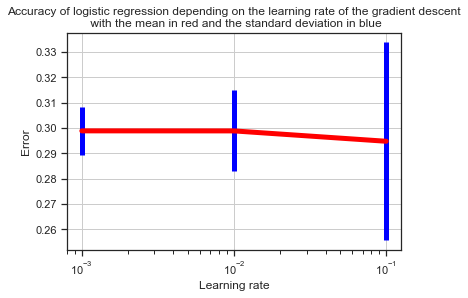

In [93]:
#plt.plot(n_iterations, mus)
plt.xlabel('Learning rate')
plt.ylabel('Error')
plt.xscale(value = 'log')
plt.errorbar(learning_rates, error, stds, color = 'red', ecolor = 'blue', linewidth = 5)
plt.grid()
plt.title('Accuracy of logistic regression depending on the learning rate of the gradient descent\n with the mean in red and the standard deviation in blue')
plt.show()

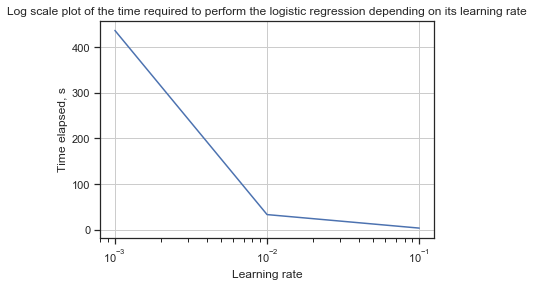

In [94]:
plt.plot(learning_rates, times)
plt.xlabel('Learning rate')
plt.ylabel('Time elapsed, s')
plt.xscale(value = 'log')
plt.grid()
plt.title('Log scale plot of the time required to perform the logistic regression depending on its learning rate')
plt.show()

We see that the accuracy does not depend much on the learning rate, although improves the standard deviation, but setting the learning rate closer to zero results in a significant increase of time.

Now we check how does the accuracy depend of the number of iteratins of the gradient descent method used in logistic regression. We set the maximum $n_{iterations}=10^5$ an look at it logariphmically.

In [96]:
stds = []
mus = []
times = []

n_iterations = range(6)

for n in n_iterations:
    print('n_iterations =', 10**n)
    start_time = time.time()
    mu_LR, std_LR = Linear_Regression_Iter_k_Fold_Cross_Validation(tictactoe_num,
                                                              k = 5,
                                                              n_iterations = 10**n)
    time_ellapsed = time.time() - start_time
    
    print('Time ellapsed:', time_ellapsed)
    times.append(time_ellapsed)
    
    mus.append(mu_LR)
    stds.append(std_LR)
    
    print('----------------------------------------')

n_iterations = 1
Logistic regression:
Fold 1
Correct classifications: 145
Incorrect classifications: 47
Accuracy of the logistic regression: 0.7552083333333334
----------------------------------------
Fold 2
Correct classifications: 125
Incorrect classifications: 67
Accuracy of the logistic regression: 0.6510416666666666
----------------------------------------
Fold 3
Correct classifications: 111
Incorrect classifications: 80
Accuracy of the logistic regression: 0.581151832460733
----------------------------------------
Fold 4
Correct classifications: 131
Incorrect classifications: 60
Accuracy of the logistic regression: 0.6858638743455497
----------------------------------------
Fold 5
Correct classifications: 113
Incorrect classifications: 78
Accuracy of the logistic regression: 0.5916230366492147
----------------------------------------
Logistic regression mean: 0.6529777486910995
Logistic regression standard deviation: 0.06396827501587454
Time ellapsed: 0.03567194938659668
--------

In [97]:
n_iterations

range(0, 6)

In [99]:
n_iterations = []

for n in range(6):
    n_iterations.append(10**n)
    
n_iterations

[1, 10, 100, 1000, 10000, 100000]

We can obtain error as $error = 1 - \mu$.

In [100]:
error = []
for m in mus:
    error.append(1 - m)

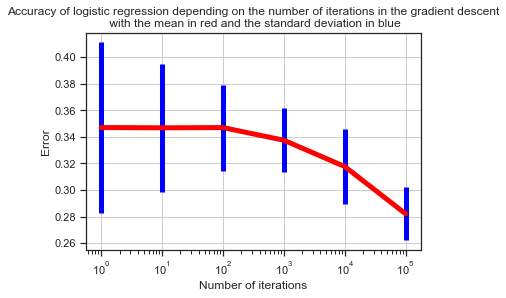

In [101]:
#plt.plot(n_iterations, mus)
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.xscale(value = 'log')
plt.errorbar(n_iterations, error, stds, color = 'red', ecolor = 'blue', linewidth = 5)
plt.grid()
plt.title('Accuracy of logistic regression depending on the number of iterations in the gradient descent\n with the mean in red and the standard deviation in blue')
plt.show()

Note that the mean of accuracy grows with the number of iterations. Note that its standard deviation shrinks. Also note that for this dataset a significant amount of iterations of the gradient descent algorithm is required to perform well.

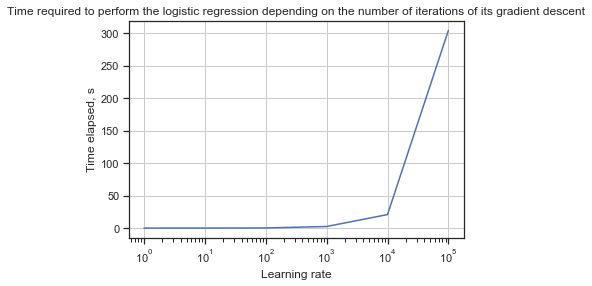

In [103]:
plt.plot(n_iterations, times)
plt.xlabel('Learning rate')
plt.ylabel('Time elapsed, s')
plt.xscale(value = 'log')
plt.grid()
plt.title('Time required to perform the logistic regression depending on the number of iterations of its gradient descent')
plt.show()

Note that the time grows linearly but the algorithm seems to overshoot often.

We can get the dependece of the error rate of both learning methods on the test/train split ratio. Firstly, the logistic regression is analyzied. Here the learning rate is set to $0.1$ for faster performance.

In [116]:
split_ratio = []
mus = []
stds = []

for i in range(1, 20):
    print('Logistic regression:')
    
    logistic_regression_accuracy = []
    
    split_ratio.append(i * 0.05)
    print('Train-to-test split ratio:', split_ratio[i - 1])
    
    # Splitting the dataset into folds:
    for k in range(5):
        msk = np.random.rand(len(tictactoe_num)) < split_ratio[i - 1]
        train = tictactoe_num[msk]
        test = tictactoe_num[~msk]
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Logistic regression
        
        LR = Logistic_Regression(lr = 1e-1)
        w = LR.fit(X_train, y_train)
        pred = LR.predict(X_test, w)
        logistic_regression_accuracy.append(LR.evaluate_acc(pred, y_test))
        
        print('----------------------------------------')
        
    mu_LR = np.mean(logistic_regression_accuracy)
    std_LR = np.std(logistic_regression_accuracy)
    
    print('Logistic regression mean:', mu_LR)
    print('Logistic regression standard deviation:', std_LR)
    
    mus.append(mu_LR)
    stds.append(std_LR)

Logistic regression:
Train-to-test split ratio: 0.05
Number of iterations of the gradient descent: 1273
Correct classifications: 539
Incorrect classifications: 368
Accuracy of the logistic regression: 0.5942668136714443
----------------------------------------
Number of iterations of the gradient descent: 2368
Correct classifications: 578
Incorrect classifications: 342
Accuracy of the logistic regression: 0.6282608695652174
----------------------------------------
Number of iterations of the gradient descent: 2278
Correct classifications: 526
Incorrect classifications: 391
Accuracy of the logistic regression: 0.5736095965103599
----------------------------------------
Number of iterations of the gradient descent: 1396
Correct classifications: 500
Incorrect classifications: 415
Accuracy of the logistic regression: 0.546448087431694
----------------------------------------
Number of iterations of the gradient descent: 3256
Correct classifications: 571
Incorrect classifications: 336
Accur

Number of iterations of the gradient descent: 1293
Correct classifications: 392
Incorrect classifications: 193
Accuracy of the logistic regression: 0.67008547008547
----------------------------------------
Number of iterations of the gradient descent: 2156
Correct classifications: 413
Incorrect classifications: 176
Accuracy of the logistic regression: 0.7011884550084889
----------------------------------------
Number of iterations of the gradient descent: 1810
Correct classifications: 383
Incorrect classifications: 175
Accuracy of the logistic regression: 0.6863799283154122
----------------------------------------
Number of iterations of the gradient descent: 2120
Correct classifications: 395
Incorrect classifications: 170
Accuracy of the logistic regression: 0.6991150442477876
----------------------------------------
Number of iterations of the gradient descent: 1818
Correct classifications: 393
Incorrect classifications: 172
Accuracy of the logistic regression: 0.695575221238938
----

Number of iterations of the gradient descent: 1900
Correct classifications: 159
Incorrect classifications: 77
Accuracy of the logistic regression: 0.673728813559322
----------------------------------------
Number of iterations of the gradient descent: 1808
Correct classifications: 157
Incorrect classifications: 63
Accuracy of the logistic regression: 0.7136363636363636
----------------------------------------
Number of iterations of the gradient descent: 1699
Correct classifications: 190
Incorrect classifications: 57
Accuracy of the logistic regression: 0.7692307692307693
----------------------------------------
Number of iterations of the gradient descent: 1801
Correct classifications: 174
Incorrect classifications: 69
Accuracy of the logistic regression: 0.7160493827160493
----------------------------------------
Number of iterations of the gradient descent: 1742
Correct classifications: 159
Incorrect classifications: 74
Accuracy of the logistic regression: 0.6824034334763949
-------

Similarly, we obtain the error as $error = 1 - \mu$.

In [117]:
error = []
for m in mus:
    error.append(1 - m)

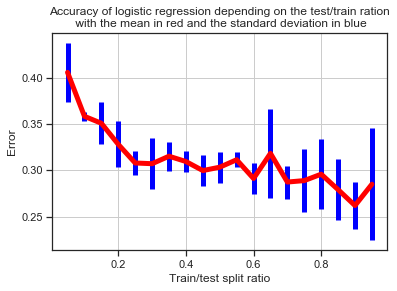

In [118]:
#plt.plot(n_iterations, mus)
plt.xlabel('Train/test split ratio')
plt.ylabel('Error')
#plt.xscale(value = 'log')
plt.errorbar(split_ratio, error, stds, color = 'red', ecolor = 'blue', linewidth = 5)
plt.grid()
plt.title('Accuracy of logistic regression depending on the test/train ration\n with the mean in red and the standard deviation in blue')
plt.show()

Note that the error assymptotically goes down when we use more data for trainging until the very end where the test data becomes insufficient.

Now the Categorical Naive Bayes can be analyzed. Note that low train/test ratios are not considered due to errors appearing in categorical naive Bayes.

In [120]:
split_ratio = []
mus = []
stds = []

for i in range(5, 100):
    print('Gaussian Naive Bayes:')
    
    naive_bayes_accuracy = []
    
    split_ratio.append(i * 0.01)
    print('Train-to-test split ratio:', split_ratio[i - 5])
    
    # Splitting the dataset into folds:
    for k in range(5):
        msk = np.random.rand(len(tictactoe_num)) < split_ratio[i - 5]
        train = tictactoe_num[msk]
        test = tictactoe_num[~msk]
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Naive Bayes
        print('Naive Bayes')
        CNB = CategoricalNaiveBayes()
        priors = CNB.fit(X_train, y_train)
        pred = CNB.predict(X_test, priors)
        naive_bayes_accuracy.append(CNB.evaluate_acc(pred, y_test))
        print('----------------------------------------')
        
    mu_NB = np.mean(naive_bayes_accuracy)
    std_NB = np.std(naive_bayes_accuracy)
    
    print('Naive Bayes mean:', mu_NB)
    print('Naive Bayes standard deviation:', std_NB)
    
    mus.append(mu_NB)
    stds.append(std_NB)

Gaussian Naive Bayes:
Train-to-test split ratio: 0.05
Naive Bayes
Correct classifications: 611
Incorrect classifications: 293
Accuracy of the naive Bayes: 0.6758849557522124
----------------------------------------
Naive Bayes
Correct classifications: 603
Incorrect classifications: 295
Accuracy of the naive Bayes: 0.6714922048997772
----------------------------------------
Naive Bayes
Correct classifications: 620
Incorrect classifications: 299
Accuracy of the naive Bayes: 0.6746463547334058
----------------------------------------
Naive Bayes
Correct classifications: 601
Incorrect classifications: 308
Accuracy of the naive Bayes: 0.6611661166116611
----------------------------------------
Naive Bayes
Correct classifications: 624
Incorrect classifications: 289
Accuracy of the naive Bayes: 0.683461117196057
----------------------------------------
Naive Bayes mean: 0.6733301498386227
Naive Bayes standard deviation: 0.007242067027077492
Gaussian Naive Bayes:
Train-to-test split ratio: 0.0

Correct classifications: 552
Incorrect classifications: 276
Accuracy of the naive Bayes: 0.6666666666666666
----------------------------------------
Naive Bayes
Correct classifications: 585
Incorrect classifications: 246
Accuracy of the naive Bayes: 0.703971119133574
----------------------------------------
Naive Bayes mean: 0.6908203258006909
Naive Bayes standard deviation: 0.017817876492603614
Gaussian Naive Bayes:
Train-to-test split ratio: 0.15
Naive Bayes
Correct classifications: 573
Incorrect classifications: 223
Accuracy of the naive Bayes: 0.7198492462311558
----------------------------------------
Naive Bayes
Correct classifications: 557
Incorrect classifications: 229
Accuracy of the naive Bayes: 0.7086513994910941
----------------------------------------
Naive Bayes
Correct classifications: 563
Incorrect classifications: 248
Accuracy of the naive Bayes: 0.6942046855733662
----------------------------------------
Naive Bayes
Correct classifications: 573
Incorrect classificatio

Correct classifications: 515
Incorrect classifications: 212
Accuracy of the naive Bayes: 0.7083906464924347
----------------------------------------
Naive Bayes
Correct classifications: 549
Incorrect classifications: 215
Accuracy of the naive Bayes: 0.7185863874345549
----------------------------------------
Naive Bayes
Correct classifications: 500
Incorrect classifications: 236
Accuracy of the naive Bayes: 0.6793478260869565
----------------------------------------
Naive Bayes mean: 0.6942173778985798
Naive Bayes standard deviation: 0.016511237034349344
Gaussian Naive Bayes:
Train-to-test split ratio: 0.24
Naive Bayes
Correct classifications: 488
Incorrect classifications: 222
Accuracy of the naive Bayes: 0.6873239436619718
----------------------------------------
Naive Bayes
Correct classifications: 522
Incorrect classifications: 223
Accuracy of the naive Bayes: 0.7006711409395974
----------------------------------------
Naive Bayes
Correct classifications: 514
Incorrect classificati

Correct classifications: 448
Incorrect classifications: 210
Accuracy of the naive Bayes: 0.6808510638297872
----------------------------------------
Naive Bayes
Correct classifications: 441
Incorrect classifications: 209
Accuracy of the naive Bayes: 0.6784615384615384
----------------------------------------
Naive Bayes
Correct classifications: 457
Incorrect classifications: 203
Accuracy of the naive Bayes: 0.6924242424242424
----------------------------------------
Naive Bayes mean: 0.6956538518966554
Naive Bayes standard deviation: 0.015197417969199517
Gaussian Naive Bayes:
Train-to-test split ratio: 0.33
Naive Bayes
Correct classifications: 433
Incorrect classifications: 203
Accuracy of the naive Bayes: 0.6808176100628931
----------------------------------------
Naive Bayes
Correct classifications: 447
Incorrect classifications: 188
Accuracy of the naive Bayes: 0.7039370078740157
----------------------------------------
Naive Bayes
Correct classifications: 424
Incorrect classificati

Correct classifications: 388
Incorrect classifications: 158
Accuracy of the naive Bayes: 0.7106227106227107
----------------------------------------
Naive Bayes
Correct classifications: 404
Incorrect classifications: 149
Accuracy of the naive Bayes: 0.7305605786618445
----------------------------------------
Naive Bayes
Correct classifications: 386
Incorrect classifications: 158
Accuracy of the naive Bayes: 0.7095588235294118
----------------------------------------
Naive Bayes mean: 0.710198578413396
Naive Bayes standard deviation: 0.012098152322850489
Gaussian Naive Bayes:
Train-to-test split ratio: 0.43
Naive Bayes
Correct classifications: 408
Incorrect classifications: 138
Accuracy of the naive Bayes: 0.7472527472527473
----------------------------------------
Naive Bayes
Correct classifications: 379
Incorrect classifications: 146
Accuracy of the naive Bayes: 0.7219047619047619
----------------------------------------
Naive Bayes
Correct classifications: 359
Incorrect classificatio

Correct classifications: 336
Incorrect classifications: 141
Accuracy of the naive Bayes: 0.7044025157232704
----------------------------------------
Naive Bayes
Correct classifications: 335
Incorrect classifications: 137
Accuracy of the naive Bayes: 0.7097457627118644
----------------------------------------
Naive Bayes mean: 0.6947655205975348
Naive Bayes standard deviation: 0.012300763329040572
Gaussian Naive Bayes:
Train-to-test split ratio: 0.52
Naive Bayes
Correct classifications: 332
Incorrect classifications: 156
Accuracy of the naive Bayes: 0.680327868852459
----------------------------------------
Naive Bayes
Correct classifications: 324
Incorrect classifications: 148
Accuracy of the naive Bayes: 0.6864406779661016
----------------------------------------
Naive Bayes
Correct classifications: 338
Incorrect classifications: 131
Accuracy of the naive Bayes: 0.720682302771855
----------------------------------------
Naive Bayes
Correct classifications: 312
Incorrect classification

Correct classifications: 272
Incorrect classifications: 117
Accuracy of the naive Bayes: 0.699228791773779
----------------------------------------
Naive Bayes
Correct classifications: 273
Incorrect classifications: 116
Accuracy of the naive Bayes: 0.7017994858611826
----------------------------------------
Naive Bayes
Correct classifications: 264
Incorrect classifications: 114
Accuracy of the naive Bayes: 0.6984126984126984
----------------------------------------
Naive Bayes mean: 0.7071008251165602
Naive Bayes standard deviation: 0.010812920068829751
Gaussian Naive Bayes:
Train-to-test split ratio: 0.61
Naive Bayes
Correct classifications: 268
Incorrect classifications: 113
Accuracy of the naive Bayes: 0.7034120734908137
----------------------------------------
Naive Bayes
Correct classifications: 271
Incorrect classifications: 97
Accuracy of the naive Bayes: 0.7364130434782609
----------------------------------------
Naive Bayes
Correct classifications: 266
Incorrect classification

Correct classifications: 200
Incorrect classifications: 98
Accuracy of the naive Bayes: 0.6711409395973155
----------------------------------------
Naive Bayes
Correct classifications: 206
Incorrect classifications: 79
Accuracy of the naive Bayes: 0.7228070175438597
----------------------------------------
Naive Bayes
Correct classifications: 215
Incorrect classifications: 78
Accuracy of the naive Bayes: 0.7337883959044369
----------------------------------------
Naive Bayes
Correct classifications: 200
Incorrect classifications: 88
Accuracy of the naive Bayes: 0.6944444444444444
----------------------------------------
Naive Bayes
Correct classifications: 207
Incorrect classifications: 91
Accuracy of the naive Bayes: 0.6946308724832215
----------------------------------------
Naive Bayes mean: 0.7033623339946556
Naive Bayes standard deviation: 0.02235095699396737
Gaussian Naive Bayes:
Train-to-test split ratio: 0.71
Naive Bayes
Correct classifications: 198
Incorrect classifications: 8

Correct classifications: 127
Incorrect classifications: 53
Accuracy of the naive Bayes: 0.7055555555555556
----------------------------------------
Naive Bayes mean: 0.7065213384038811
Naive Bayes standard deviation: 0.022713831670555452
Gaussian Naive Bayes:
Train-to-test split ratio: 0.8
Naive Bayes
Correct classifications: 145
Incorrect classifications: 53
Accuracy of the naive Bayes: 0.7323232323232324
----------------------------------------
Naive Bayes
Correct classifications: 133
Incorrect classifications: 57
Accuracy of the naive Bayes: 0.7
----------------------------------------
Naive Bayes
Correct classifications: 139
Incorrect classifications: 56
Accuracy of the naive Bayes: 0.7128205128205128
----------------------------------------
Naive Bayes
Correct classifications: 134
Incorrect classifications: 49
Accuracy of the naive Bayes: 0.73224043715847
----------------------------------------
Naive Bayes
Correct classifications: 116
Incorrect classifications: 48
Accuracy of the

Correct classifications: 75
Incorrect classifications: 37
Accuracy of the naive Bayes: 0.6696428571428571
----------------------------------------
Naive Bayes
Correct classifications: 79
Incorrect classifications: 28
Accuracy of the naive Bayes: 0.7383177570093458
----------------------------------------
Naive Bayes mean: 0.6911033752144202
Naive Bayes standard deviation: 0.026491720041943244
Gaussian Naive Bayes:
Train-to-test split ratio: 0.89
Naive Bayes
Correct classifications: 60
Incorrect classifications: 40
Accuracy of the naive Bayes: 0.6
----------------------------------------
Naive Bayes
Correct classifications: 78
Incorrect classifications: 21
Accuracy of the naive Bayes: 0.7878787878787878
----------------------------------------
Naive Bayes
Correct classifications: 62
Incorrect classifications: 26
Accuracy of the naive Bayes: 0.7045454545454546
----------------------------------------
Naive Bayes
Correct classifications: 69
Incorrect classifications: 30
Accuracy of the na

Correct classifications: 11
Incorrect classifications: 8
Accuracy of the naive Bayes: 0.5789473684210527
----------------------------------------
Naive Bayes mean: 0.703045967190704
Naive Bayes standard deviation: 0.07090335650653082
Gaussian Naive Bayes:
Train-to-test split ratio: 0.98
Naive Bayes
Correct classifications: 16
Incorrect classifications: 12
Accuracy of the naive Bayes: 0.5714285714285714
----------------------------------------
Naive Bayes
Correct classifications: 16
Incorrect classifications: 7
Accuracy of the naive Bayes: 0.6956521739130435
----------------------------------------
Naive Bayes
Correct classifications: 15
Incorrect classifications: 2
Accuracy of the naive Bayes: 0.8823529411764706
----------------------------------------
Naive Bayes
Correct classifications: 14
Incorrect classifications: 3
Accuracy of the naive Bayes: 0.8235294117647058
----------------------------------------
Naive Bayes
Correct classifications: 18
Incorrect classifications: 8
Accuracy o

In [121]:
error = []
for m in mus:
    error.append(1 - m)

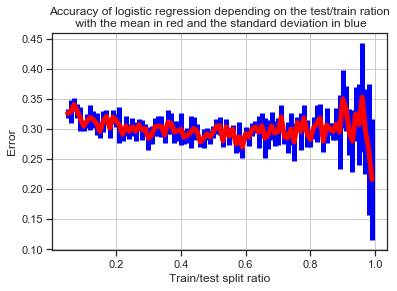

In [122]:
#plt.plot(n_iterations, mus)
plt.xlabel('Train/test split ratio')
plt.ylabel('Error')
#plt.xscale(value = 'log')
plt.errorbar(split_ratio, error, stds, color = 'red', ecolor = 'blue', linewidth = 5)
plt.grid()
plt.title('Accuracy of logistic regression depending on the test/train ration\n with the mean in red and the standard deviation in blue')
plt.show()

Note that the error rate is not signifficantly affected by the choise of training until the very end where the test data becomes insufficient. Naive Bayes seems to keep its error of ~$0.30$ while the logistic regression shows such results only when taking almost all the data for training.